In [6]:
import numpy as np 
import pandas as pa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
csv = pa.read_csv("./heart_preprocess.csv")

In [3]:
csv.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1.5,145,233,0,2,150.0,0,2.3,3,0.0,6,1
1,67,1,4.0,160,286,0,2,108.0,1,1.5,2,2.5,3,0
2,67,1,4.0,120,229,0,2,129.0,1,2.6,2,2.0,7,1
3,37,1,3.0,130,250,0,0,187.0,0,3.5,3,0.0,3,1
4,41,0,2.0,130,204,0,2,172.0,0,1.4,1,0.0,3,1


In [4]:
x = csv.drop(columns = ['target','ca','slope','oldpeak','cp'])
y = csv['target']

In [5]:
x

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,thal
0,63,1,145,233,0,2,150.0,0,6
1,67,1,160,286,0,2,108.0,1,3
2,67,1,120,229,0,2,129.0,1,7
3,37,1,130,250,0,0,187.0,0,3
4,41,0,130,204,0,2,172.0,0,3
...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,0,0,132.0,0,7
299,68,1,144,193,0,0,141.0,0,7
300,57,1,130,131,0,0,115.0,1,7
301,57,0,130,236,0,2,174.0,0,3


In [6]:
standardScaler = StandardScaler()
X_ = standardScaler.fit_transform(x)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sea

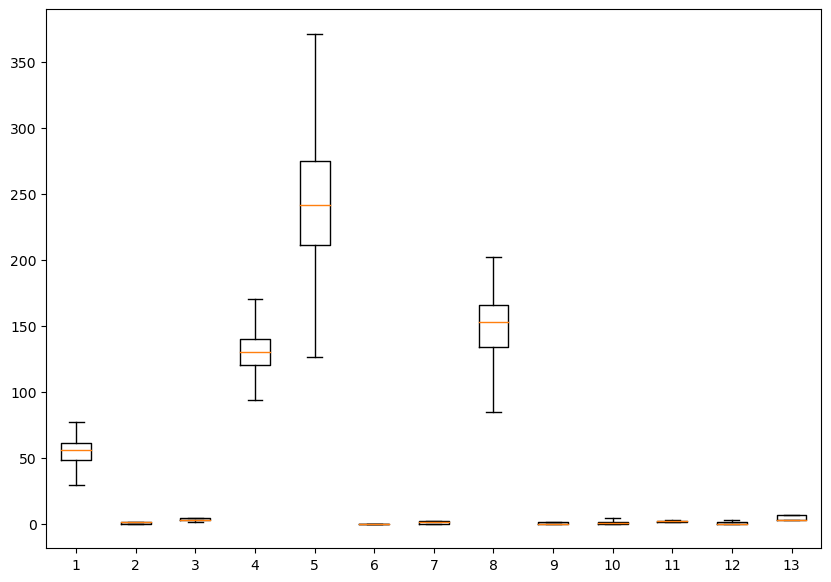

In [13]:
fig = plt.figure(figsize =(10, 7))
# Creating plot
outtab = csv[num_tab[:-1]]
plt.boxplot(outtab)
plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_,y, test_size = 0.3)

In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score

In [28]:
rf_classifier = RandomForestClassifier(n_estimators = 200)
rf_classifier.fit(X_train, y_train)
rf_classifier.score(X_test, y_test)

0.978021978021978

In [29]:
svc_cls = SVC()
svc_cls.fit(X_train, y_train)
svc_cls.score(X_test, y_test)

0.9120879120879121

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
MLP_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
MLP_classifier.fit(X_train, y_train)
MLP_classifier.score(X_test, y_test)

0.978021978021978

In [32]:
rf_clf = RandomForestClassifier(n_estimators = 200)
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
nn_clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [33]:
from sklearn.ensemble import VotingClassifier

In [34]:
# Create the ensemble model using VotingClassifier
ensemble_clf = VotingClassifier(estimators=[('rf', rf_clf), ('svm', svm_clf), ('nn', nn_clf)], voting='hard')

# Train the ensemble model
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=200)),
                             ('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=42)),
                             ('nn',
                              MLPClassifier(hidden_layer_sizes=(100, 50),
                                            max_iter=500, random_state=42))])

In [35]:
# Make predictions
y_pred = ensemble_clf.predict(X_test)

In [36]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.989010989010989


In [37]:
confuse = confusion_matrix(y_test,  y_pred)
confuse

array([[40,  1],
       [ 0, 50]], dtype=int64)

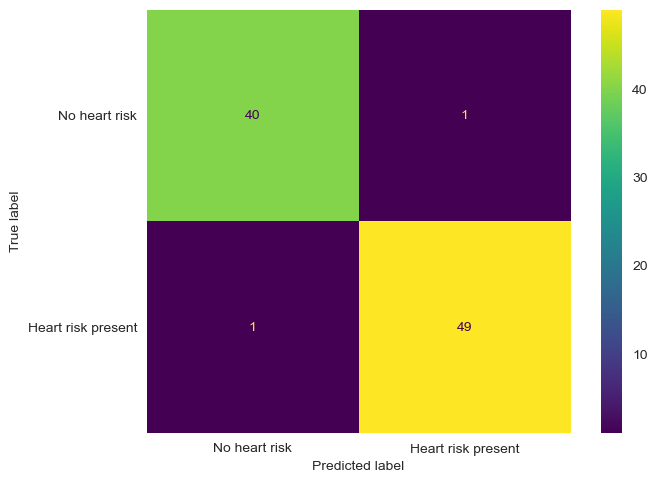

In [119]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confuse, display_labels = ["No heart risk", "Heart risk present"])
cm_display.plot()
plt.grid(False)
plt.show()

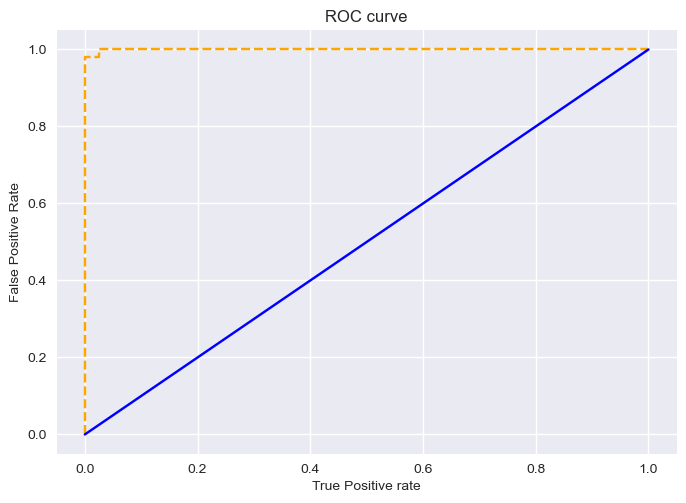

In [120]:
from sklearn.metrics import roc_curve

pred_prob1 = ensemble_clf.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Ensemble')
plt.plot(p_fpr, p_tpr, color='blue')
plt.title('ROC curve')
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive rate')
plt.show()

In [38]:
precision_score(y_test, y_pred)

0.9803921568627451

In [39]:
recall_score(y_test, y_pred)

1.0

In [40]:
from sklearn.metrics import classification_report 

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.98      1.00      0.99        50

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91



In [41]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [24]:
with open('./models/standardScaler2.pickle', 'wb') as f:
    # Pickle the object to the file
    pickle.dump(standardScaler, f)

In [25]:
with open('./models/ensemble_heart2.pickle', 'wb') as f:
    # Pickle the object to the file
    pickle.dump(ensemble_clf, f)

# Sleep

In [7]:
csv_sleep = pa.read_csv("./sleep_preprocess.csv")

In [8]:
csv_sleep

,Gender,Occupation,BMI Category,systolic,diastolic,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder
0,0,0,0.0,126,83,27,6.1,6,42,6,77,4200,0
1,0,1,1.0,125,80,28,6.2,6,60,8,75,10000,0
2,0,1,1.0,125,80,28,6.2,6,60,8,75,10000,0
3,0,2,2.0,140,90,28,5.9,4,30,8,78,3000,1
4,0,2,2.0,140,90,28,5.9,4,30,8,78,3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,4,0.0,140,95,59,8.1,9,75,3,68,7000,1
370,1,4,0.0,140,95,59,8.0,9,75,3,68,7000,1
371,1,4,0.0,140,95,59,8.1,9,75,3,68,7000,1
372,1,4,0.0,140,95,59,8.1,9,75,3,68,7000,1


In [9]:
x_sleep = csv_sleep.drop(columns = ['Sleep Disorder'])
y_sleep = csv_sleep['Sleep Disorder']

In [10]:
x_sleep

,Gender,Occupation,BMI Category,systolic,diastolic,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,0,0,0.0,126,83,27,6.1,6,42,6,77,4200
1,0,1,1.0,125,80,28,6.2,6,60,8,75,10000
2,0,1,1.0,125,80,28,6.2,6,60,8,75,10000
3,0,2,2.0,140,90,28,5.9,4,30,8,78,3000
4,0,2,2.0,140,90,28,5.9,4,30,8,78,3000
...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,4,0.0,140,95,59,8.1,9,75,3,68,7000
370,1,4,0.0,140,95,59,8.0,9,75,3,68,7000
371,1,4,0.0,140,95,59,8.1,9,75,3,68,7000
372,1,4,0.0,140,95,59,8.1,9,75,3,68,7000


In [11]:
y_sleep

0      0
1      0
2      0
3      1
4      1
      ..
369    1
370    1
371    1
372    1
373    1
Name: Sleep Disorder, Length: 374, dtype: int64

In [13]:
Scale = StandardScaler()
X_sleep = Scale.fit_transform(x_sleep.drop(columns = ['Occupation','Quality of Sleep']))

In [14]:
X_sleep[0].shape

(10,)

In [15]:
X_train_sleep, X_test_sleep, y_train_sleep, y_test_sleep = train_test_split(X_sleep,y_sleep, test_size = 0.2)

In [132]:
rf_classifier_sleep = RandomForestClassifier()
rf_classifier_sleep.fit(X_train_sleep, y_train_sleep)
rf_classifier_sleep.score(X_test_sleep, y_test_sleep)

0.96

In [133]:
svc_cls = SVC()
svc_cls.fit(X_train_sleep, y_train_sleep)
svc_cls.score(X_test_sleep, y_test_sleep)

0.9333333333333333

In [134]:
MLP_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
MLP_classifier.fit(X_train_sleep, y_train_sleep)
MLP_classifier.score(X_test_sleep, y_test_sleep)

0.96

In [135]:
rf_clf_sleep = RandomForestClassifier(n_estimators = 200)
svm_clf_sleep = SVC(kernel='linear', probability=True, random_state=42)
nn_clf_sleep = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [136]:
from sklearn.ensemble import VotingClassifier

In [137]:
# Create the ensemble model using VotingClassifier
ensemble_clf_sleep = VotingClassifier(estimators=[('rf', rf_clf_sleep), ('svm', svm_clf_sleep), ('nn', nn_clf_sleep)], voting='soft')

# Train the ensemble model
ensemble_clf_sleep.fit(X_train_sleep, y_train_sleep)

VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=200)),
                             ('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=42)),
                             ('nn',
                              MLPClassifier(hidden_layer_sizes=(100, 50),
                                            max_iter=500, random_state=42))],
                 voting='soft')

In [138]:
# Make predictions
y_pred_sleep = ensemble_clf_sleep.predict(X_test_sleep)

In [139]:
# Calculate accuracy
accuracy = accuracy_score(y_test_sleep, y_pred_sleep)
print("Accuracy:", accuracy)

Accuracy: 0.96


In [140]:
confuse = confusion_matrix(y_test_sleep,  y_pred_sleep)
confuse

array([[43,  0,  0],
       [ 1, 15,  0],
       [ 0,  2, 14]], dtype=int64)

In [141]:
precision_score(y_test_sleep,  y_pred_sleep, average='micro')

0.96

In [142]:
recall_score(y_test_sleep,  y_pred_sleep, average='micro')

0.96

In [143]:
import pickle
with open('./models/Scale_sleep2.pickle', 'wb') as f:
    # Pickle the object to the file
    pickle.dump(Scale, f)

In [145]:
with open('./models/ensemble_sleep2.pickle', 'wb') as f:
    # Pickle the object to the file
    pickle.dump(ensemble_clf_sleep, f)

In [3]:
import pickle
with open('./models/ensemble_sleep2.pickle2', 'rb') as f:
    # Load the object from the file
    ensem_sleep = pickle.load(f)

In [16]:
y_pred = ensem_sleep.predict(X_test_sleep)

In [17]:
from sklearn.metrics import classification_report 

report = classification_report(y_test_sleep, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        44
           1       0.94      1.00      0.97        15
           2       0.93      0.81      0.87        16

    accuracy                           0.95        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.95      0.95      0.95        75

